Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

Data Preparation

In [3]:
pd.read_csv("data.csv")

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [15]:
df.dtypes == "object"

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [16]:
df.dtypes[df.dtypes == "object"]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [14]:
df.dtypes[df.dtypes == "object"].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [18]:
strings = df.dtypes[df.dtypes == "object"].index
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_") 
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Exploratory Data Analysis

In [25]:
for col in df.columns:
    print(col, df[col].unique()[:5], df[col].nunique(),"\n")

make ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler'] 48 

model ['1_series_m' '1_series' '100' '124_spider' '190-class'] 914 

year [2011 2012 2013 1992 1993] 28 

engine_fuel_type ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'] 10 

engine_hp [335. 300. 230. 320. 172.] 356 

engine_cylinders [ 6.  4.  5.  8. 12.] 9 

transmission_type ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown'] 5 

driven_wheels ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive'] 4 

number_of_doors [ 2.  4.  3. nan] 3 

market_category ['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance'] 71 

vehicle_size ['compact' 'midsize' 'large'] 3 

vehicle_style ['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback'] 16 

highway_mpg [26 28 27 25 24] 59 

city_mpg [19 20 18 17 16] 69 

popularity [3916 3105  819  617 1013] 48 

msrp [46135 40650 

Distribution of price

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

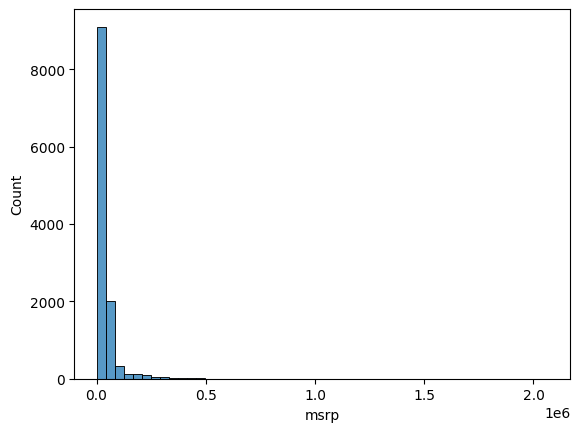

In [ ]:
# Histogram Plot
sns.histplot(df.msrp, bins=50) # 50 is the number of bars that we want
#1e6 = 10^6 = 1,000,000
#Long Tail Distribution

<Axes: xlabel='msrp', ylabel='Count'>

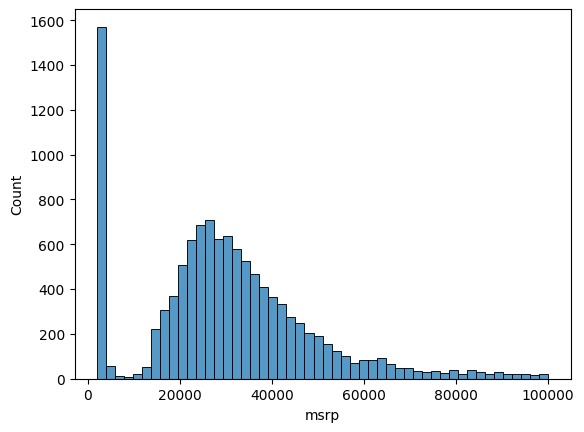

In [33]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

This kind of distribution is good for the model, the tail (msrp > 60000) is confuse it and skew things.

In [ ]:
np.log([0 , 1, 10, 100, 1000, 10000])

C:\Users\Kritika Taank\AppData\Local\Temp\ipykernel_33064\1776958785.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 100, 1000, 10000, 100000, 1000000])


array([       -inf,  0.        ,  2.30258509,  4.60517019,  6.90775528,
        9.21034037, 11.51292546, 13.81551056])

In [ ]:
np.log([0 +1 , 1 +1, 10 +1, 100 +1, 1000 +1, 10000 +1])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [37]:
np.log1p([0 , 1, 10, 100, 1000, 10000]) 

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [38]:
price_log = np.log1p(df.msrp)
price_log

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

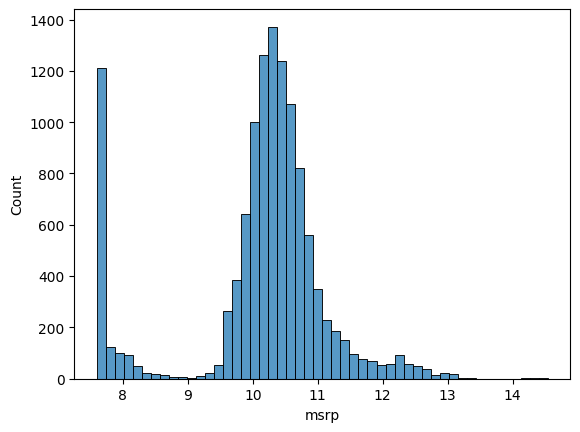

In [39]:
sns.histplot(price_log, bins=50)

The above looks like a normal distribution, this situation is ideal for models.

Missing Values

In [40]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Setting up the validation framework

In [ ]:
#Train - 60%, Val - 20%, Test - 20%
n = len(df)
n_val= int(len(df) * 0.2)
n_test= int(len(df) * 0.2)
n_train = n - n_val - n_test

(11914, 11914)

In [46]:
n, n_train + n_val + n_test

(11914, 11914)

In [47]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [52]:
#we need to shuffle the data before splitting
df.iloc[[10,0,3,5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [53]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [70]:
idx = np.arange(n)

In [71]:
np.random.seed(2) # for reproducibility
np.random.shuffle(idx)

In [74]:
idx[:n_train]

array([2735, 6720, 5878, ..., 9334, 5284, 2420], shape=(7150,))

In [75]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [76]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [77]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [78]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)   
df_test = df_test.reset_index(drop=True)

In [79]:
df_train['msrp']

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [80]:
np.log1p(df_train['msrp'])

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [ ]:
np.log1p(df_train['msrp'].values)

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [84]:
y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

In [85]:
del df_train['msrp']
del df_val['msrp']  
del df_test['msrp']

In [86]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

Linear Regression

In [87]:
# g(X)=y [g is the model (Linear Regression) that we are trying to train on X features to predict y]
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [ ]:
#xi = [engine_hp , city_mpg , popularity]
#g(xi) = yi
#g(xi) = w0 + w1*engine_hp + w2*city_mpg + w3*popularity

xi = [453, 11, 86] #Features of 10th car in training set
w0 = 7.17 #Bias term
w = [0.01, 0.04, 0.002] #Weights for each feature

def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

linear_regression(xi)

12.312

In [93]:
np.exp(linear_regression(xi)) - 1
np.expm1(linear_regression(xi))

np.float64(222347.2221101062)

Linear Regression vector form

In [94]:
#g(xi) = w0 + SUM(wj * xij)
#Vector Notation (T is transpose) - g(xi) = w0 + xi T . w 

#Dot Product
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res += xi[j] * w[j]
    return res

In [95]:
def linear_regression(xi):
    return w0 + dot(xi, w)  

#w = [w0, w1, w2, w3]
#x = [x0, x1, x2, x3] Where x0 is always 1 (for bias term)

w_new = [w0] + w  # w_new = [w0, w1, w2, w3]
x_new = [1] + xi  # x_new = [1, x1, x2, x3]

def linear_regression(xi):
    x_new = [1] + xi  # x_new = [1, x1, x2, x3]
    return dot(x_new, w_new)  

In [96]:
linear_regression(xi)

12.312

In [97]:
# X1 | 1 x11 .. x1n |   | w0 |   | X1 T . W |
# X2 | 1 x21 .. x2n |   | w1 |   | X2 T . W |
#  . | 1 ..  .. ..  |   | .. | = |   ....   |
# Xm | 1 xm1 .. xmn |   | wn |   | Xm T . W |
        #X               # W        # Ypred
# X [m x (n+1)]  (m rows, n+1 columns) 

w0 = 7.17 #Bias term
w = [0.01, 0.04, 0.002] #Weights for each feature
w_new = [w0] + w  # w_new = [w0, w1, w2, w3]

x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [99]:
def linear_regression(X):
    return X.dot(w_new)  #Dot product of each row of X with w_new

linear_regression(X)

array([12.38 , 13.552, 12.312])

Training a Linear Regression Model

In [139]:
# g(X) = X . W (Ypred)
# Ypred to be close to Y (true values)
# X . W = y (Let us assume that X is invertible X^-1 exists)
# X^-1 . X . W = X^-1 . y
# I . W = X^-1 . y
# W = X^-1 . y

# But X is not always invertible as it may not be a square matrix (m rows and n+1 columns)
# So we use the Transpose of X denoted by X^T

# X^T . g(X) = X^T . y
# X^T . X . W = X^T . y    [X^T . X  is called Gram Matrix]
# And X^T . X is always square matrix and invertible
# (X^T . X)^-1 . X^T . X . W = (X^T . X)^-1 . X^T . y
# I . W = (X^T . X)^-1 . X^T . y    [I . W = W] 
# W = (X^T . X)^-1 . X^T . y   

def train_linear_regression(X, y):
    pass

In [167]:
X = [[148, 24, 1385], 
     [132, 25, 2031],
     [453, 11, 86],
     [158, 24, 185], 
     [172, 25, 201],
     [413, 11, 86],
     [38,  54, 185], 
     [142, 25, 431],
     [453, 31, 86]
    ]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [171]:
#Include bias term
ones = np.ones(X.shape[0]) 
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [172]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [168]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [173]:
XTX = X.T.dot(X) # Gram Matrix
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [174]:
XTX_inv = np.linalg.inv(XTX) # Inverse of Gram Matrix
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [175]:
XTX.dot(XTX_inv) 
XTX.dot(XTX_inv).round(1) # Not exactly identity matrix but very close to it we can treat the numbers as 0s

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [176]:
W_full = XTX_inv.dot(X.T).dot(y)
W_full[0], W_full[1:]

(np.float64(300.0677669255554), array([-0.22774253, -2.5769413 , -0.02301206]))

In [169]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    W_full = XTX_inv.dot(X.T).dot(y)
    return W_full[0], W_full[1:]  # return bias and weights

train_linear_regression(X, y)

(np.float64(300.0677669255554), array([-0.22774253, -2.5769413 , -0.02301206]))

Car Price Baseline Model

In [177]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [178]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [180]:
X_train = df_train[base].values

In [181]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [184]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [188]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [192]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [193]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [195]:
y_pred =w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

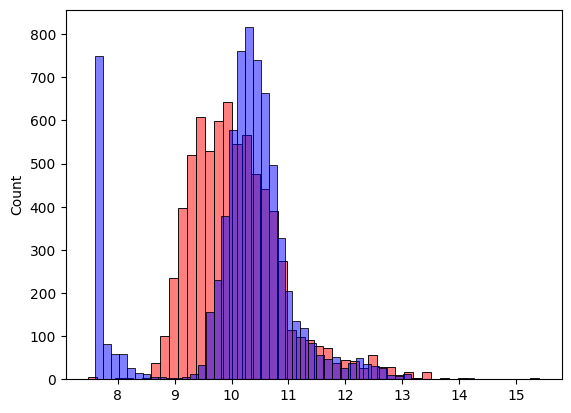

In [197]:
sns.histplot(y_pred, bins=50, alpha = 0.5, color='red')
sns.histplot(y_train, bins=50, alpha = 0.5, color='blue')

RMSE - Root Mean Square Error

In [ ]:
# RMSE = Root Mean Square Error
# g(Xi) - yi
# (g(Xi) - yi)^2
# SUM (g(Xi) - yi)^2
# 1/n * SUM (g(Xi) - yi)^2 (We are computing the MEAN)
# RMSE = sqrt( 1/n * SUM( g(Xi) - yi )^2 )
# where g(Xi) is y_pred and yi is y_train

In [200]:
def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [201]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

Validating the Model

In [203]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred =w0 + X_train.dot(w)

In [204]:
def prepare_X(df):
    base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
    X = df[base].fillna(0).values
    return X

In [205]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.761653099130156)

Simple Feature Engineering

In [210]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [ ]:
def prepare_X(df):
    df = df.copy()
    base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
    df['age'] = df.year.max() - df.year
    base = base + ['age']
    X = df[base].fillna(0).values
    return X

In [223]:
X_train = prepare_X(df_train)
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [222]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [225]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

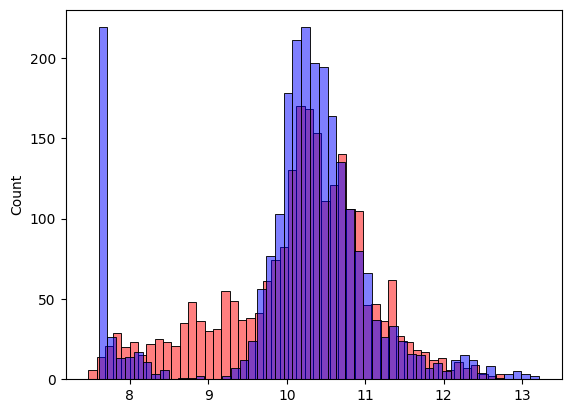

In [226]:
sns.histplot(y_pred, bins=50, alpha = 0.5, color='red')
sns.histplot(y_val, bins=50, alpha = 0.5, color='blue')

Categorical Variables

In [227]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [228]:
df_train['number_of_doors']

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [234]:
# ND    #ND2    #ND3    #ND4
# | 2   | 1     | 0     | 0
# | 3   | 0     | 1     | 0
# | 4   | 0     | 0     | 1
# | 2   | 1     | 0     | 0

for v in df_train['number_of_doors'].unique():
    df_train['num_doors_%s' % v] = (df_train['number_of_doors'] == v).astype(int)
    
(df_train['number_of_doors'] == 2).astype(int)


0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [246]:
def prepare_X(df):
    df = df.copy()
    base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
    df['age'] = df.year.max() - df.year
    features = base + ['age']

    for v in [2,3,4]:  #df['number_of_doors'].unique():
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype(int)
        features.append('num_doors_%s' % v)
        
    X = df[features].fillna(0).values
    return X

In [247]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [248]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.515799564150169)

In [249]:
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [250]:
makes = list(df.make.value_counts().head().index)

In [ ]:
def prepare_X(df):
    df = df.copy()
    base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
    df['age'] = df.year.max() - df.year
    features = base + ['age']

    for v in [2,3,4]:  #df['number_of_doors'].unique():
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype(int)
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df['make'] == v).astype(int)
        features.append('make_%s' % v)
        
    X = df[features].fillna(0).values
    return X

In [252]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5076038849556795)

In [253]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

This way of including categorical variables is called one-hot encoding.

In [254]:
categorical = df_train.dtypes[df_train.dtypes == "object"].index
categorical

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [257]:
categories = ['make', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [258]:
categoriess = {}

for c in categories:
    categoriess[c] = list(df[c].value_counts().head().index)

In [259]:
categoriess

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [264]:
def prepare_X(df):
    df = df.copy()
    base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
    df['age'] = df.year.max() - df.year
    features = base + ['age']

    for v in [2,3,4]:  #df['number_of_doors'].unique():
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype(int)
        features.append('num_doors_%s' % v)

    for c, values in categoriess.items():
        for v in values:  #df[c].unique():
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
        
    X = df[features].fillna(0).values
    return X

In [266]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(23.019020704791835)

Regilarization

In [267]:
# w = (X^T. X)^-1 . X^T . Y
# The problem is sometimes (X^T. X)^-1 does not exist (not invertible)

X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]
]
X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [268]:
X.T.dot(X)

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [269]:
np.linalg.inv(X.T.dot(X))

LinAlgError: Singular matrix

A square matrix A has an inverse iff its determinant ≠ 0,
or equivalently, its rows (and columns) are linearly independent.
Look at rows 2 and 3:
[111,108,108] and [111,108,108]
They’re identical. That means: The rows are linearly dependent.

Because one row is a duplicate of another, the matrix’s rank is 2, not 3.
That makes the determinant 0, and thus the matrix non-invertible (singular).
When two rows (or columns) are identical, they represent the same equation in the system.
So you don’t have enough independent information to find a unique solution —
there’s an infinite set of possible solutions instead.

That’s why np.linalg.inv() fails with:
LinAlgError: Singular matrix

In [281]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5.00003],
    [4.0002,5,5.00000001]
]
X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.00003   ],
       [4.0002    , 5.        , 5.00000001]])

In [282]:
XTX = X.T.dot(X)
XTX

array([[140.00160004, 111.001     , 111.00121004],
       [111.001     , 108.        , 108.00015005],
       [111.00121004, 108.00015005, 108.0003001 ]])

In [285]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.67064898e-02,  3.77016776e+03, -3.77021052e+03],
       [ 3.77016776e+03,  1.75041984e+09, -1.75042129e+09],
       [-3.77021052e+03, -1.75042129e+09,  1.75042273e+09]])

If two columns are identical (or almost identical), X^T X will be singular or ill-conditioned. That makes np.linalg.inv(XTX) fail or produce numerically unstable results.

In [284]:
y = [1,2,3,1,2,3]
y = np.array(y)
y

array([1, 2, 3, 1, 2, 3])

In [286]:
XTX_inv.dot(X.T).dot(y)

array([ 4.22030944e-01,  3.96772819e+04, -3.96772346e+04])

In [300]:
XTX = [
    [1,2,2],
    [2,1,1.00000001],
    [2,1.0000001,1]
]
#Add same number to diagonal elements to make it invertible
XTX = np.array(XTX)

In [301]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[-3.33333337e-01,  6.06060607e-01,  6.06060605e-02],
       [ 6.06060598e-02, -9.09090913e+06,  9.09090910e+06],
       [ 6.06060609e-01,  9.09090882e+06, -9.09090913e+06]])

In [306]:
xtx = np.eye(3)*0.01 + XTX
xtx

array([[1.01      , 2.        , 2.        ],
       [2.        , 1.01      , 1.00000001],
       [2.        , 1.0000001 , 1.01      ]])

In [307]:
XTX_inv = np.linalg.inv(xtx)
XTX_inv

array([[ -0.33668907,   0.33501248,   0.3350155 ],
       [  0.3350155 ,  49.91568397, -50.0848668 ],
       [  0.33501248, -50.08486527,  49.91568397]])

In [310]:
def train_linear_regression_reg(X, y, r= 0.001):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0]) * r  # Add small value to diagonal elements
    
    XTX_inv = np.linalg.inv(XTX)
    W_full = XTX_inv.dot(X.T).dot(y)
    return W_full[0], W_full[1:]  # return bias and weights

In [312]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.45652199012897743)

Tuning the model

In [313]:
for r in [0.0, 0.0001, 0.001, 0.01, 0.1, 1]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse(y_val, y_pred)
    print(r, rmse(y_val, y_pred))

0.0 23.019020704791835
0.0001 0.4565170654323052
0.001 0.45651750867781377
0.01 0.45652199012897743
0.1 0.4565692763007501
1 0.45722043179930605


In [314]:
r = 0.0001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4565170654323052)

Using the Model

In [316]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [317]:
X_full_train = prepare_X(df_full_train)
X_full_train 

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [318]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [320]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(np.float64(6.322830302349775),
 array([ 1.52506332e-03,  1.18188703e-01, -6.66105494e-03, -5.33413785e-03,
        -4.87603208e-05, -9.69091838e-02, -7.92620449e-01, -8.90861655e-01,
        -6.35100382e-01, -4.14339224e-02,  1.75560743e-01, -5.78063598e-04,
        -1.00563877e-01, -9.27549641e-02, -4.66859195e-01,  7.98658894e-02,
        -3.16047745e-01, -5.51981714e-01, -7.89526802e-02,  1.09397462e+00,
         9.18667079e-01,  1.14824449e+00,  2.65138017e+00,  5.08603719e-01,
         1.62979575e+00,  1.53049981e+00,  1.61767854e+00,  1.54567793e+00,
        -9.70559706e-02,  3.73062128e-02, -5.81767490e-02, -2.35940871e-02,
        -1.19357192e-02,  2.18895260e+00,  2.07458270e+00,  2.05916686e+00,
        -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
        -1.58817038e-01]))

In [321]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.45177493106214056)

In [322]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

In [323]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [324]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [326]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [330]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.65647006787539)

In [331]:
np.expm1(y_pred)

np.float64(42465.4685356383)

In [333]:
np.expm1(y_test[20])

np.float64(35000.00000000001)